# Loading Data 

Para o experimentos foram escolhidos XXX movimentos que foram coletados da seguinte maneira:

Para cada postura de mão, o "subject" realizou cada movimento durante 5s por vez, com um intervalo de outros 5s para repouso, para um total de 10 repetições de cada gesto. Dessa forma, obtém-se 10 amostras de cada gesto de mão, cada uma durando 5 segundos, ou seja, 5000 pontos coletados. 

O repouso foi coletado de entre alguns dos movimentos.

Os movimentos são então separados ein:

0. gesture_0: hand resting | gesto 0: mão em repouso:
1. gesture_1: close hand   | gesto 1: mão fechada

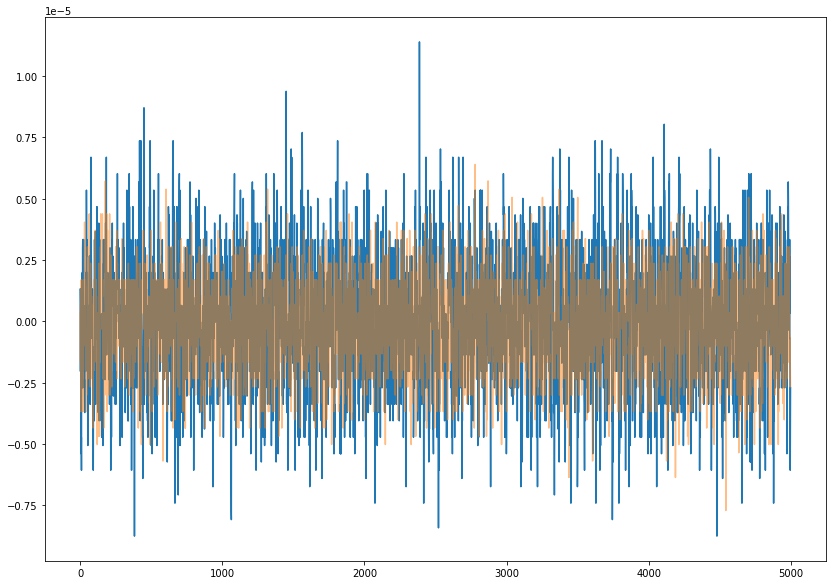

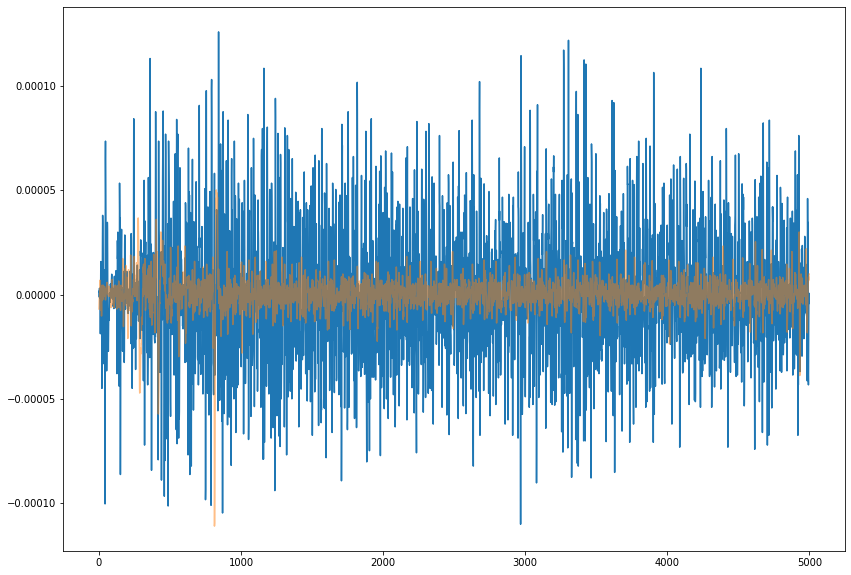

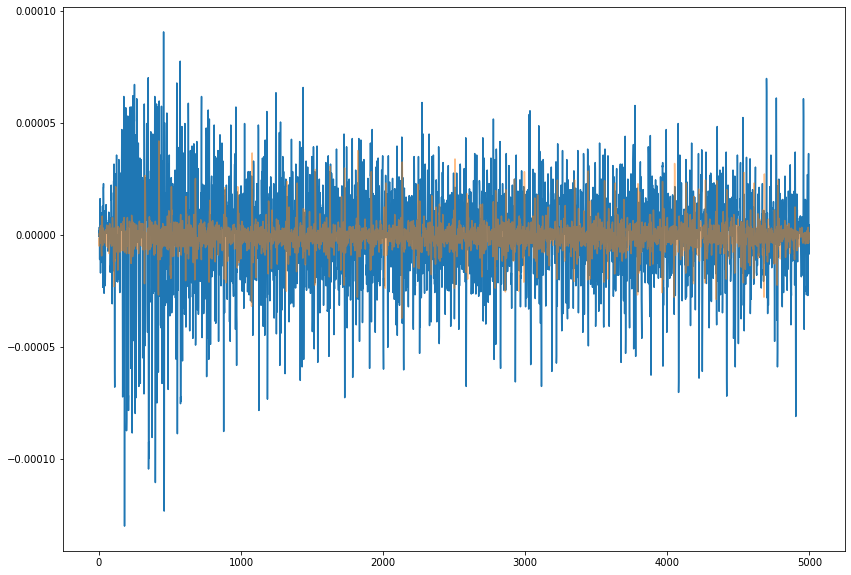

In [288]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import hmmlearn

gesture_samples = 10
n_gestures = 3
file_name = 'https://raw.githubusercontent.com/raphaelrcb/TCC_UnB/raphael_dev/data/gesture_0_0.csv'
file_name2 = 'https://raw.githubusercontent.com/raphaelrcb/TCC_UnB/raphael_dev/data/channel2_gesture_0_0.csv'

# rest_hand_series = read_csv(file_name, header=1, usecols = [0,1], index_col = 0)
rest_hand_series = []
close_hand_series = []
open_hand_series = []

rest_hand_series2 = []
close_hand_series2 = []
open_hand_series2 = []

# rest_hand_file2 = file_name2[:len(file_name2)-5] + str(888) + file_name2[len(file_name2)-4:]
# print(rest_hand_file2)

for i in range(gesture_samples):
    rest_hand_file =    file_name[:len(file_name)-5] + str(i) + file_name[len(file_name)-4:]
    rest_hand_file2 = file_name2[:len(file_name2)-5] + str(i) + file_name2[len(file_name2)-4:]
    close_hand_file =   file_name[:len(file_name)-7] + "1_" + str(i) + file_name[len(file_name)-4:]
    close_hand_file2 =   file_name2[:len(file_name2)-7] + "1_" + str(i) + file_name2[len(file_name2)-4:]
    open_hand_file =   file_name[:len(file_name)-7] + "2_" + str(i) + file_name[len(file_name)-4:]
    open_hand_file2 =   file_name2[:len(file_name2)-7] + "2_" + str(i) + file_name2[len(file_name2)-4:]
    # print(rest_hand_file) CHANNEL 1 
    rest_hand_series.append(read_csv(rest_hand_file, header=1, usecols = [0,1], index_col = 0))
    rest_hand_series[i].index = pd.to_datetime(rest_hand_series[i].index, unit = 's', origin= 'unix')
    rest_hand_series[i].index = rest_hand_series[i].index.map(lambda t: t.replace(year=2021, month=10, day=31, hour=00))
    rest_hand_series[i].index = pd.DatetimeIndex(rest_hand_series[i].index).to_period('L')

    # print(rest_hand_file) CHANNEL 2 
    rest_hand_series2.append(read_csv(rest_hand_file2, header=1, usecols = [0,1], index_col = 0))
    rest_hand_series2[i].index = pd.to_datetime(rest_hand_series2[i].index, unit = 's', origin= 'unix')
    rest_hand_series2[i].index = rest_hand_series2[i].index.map(lambda t: t.replace(year=2021, month=10, day=31, hour=00))
    rest_hand_series2[i].index = pd.DatetimeIndex(rest_hand_series2[i].index).to_period('L')

    # print(close_hand_file) CHANNEL 1
    close_hand_series.append(read_csv(close_hand_file, header=1, usecols = [0,1], index_col = 0))
    close_hand_series[i].index = pd.to_datetime(close_hand_series[i].index, unit = 's', origin= 'unix')
    close_hand_series[i].index = close_hand_series[i].index.map(lambda t: t.replace(year=2021, month=10, day=31, hour=00))
    close_hand_series[i].index = pd.DatetimeIndex(close_hand_series[i].index).to_period('L')    

    # print(close_hand_file) CHANNEL 2 
    close_hand_series2.append(read_csv(close_hand_file2, header=1, usecols = [0,1], index_col = 0))
    close_hand_series2[i].index = pd.to_datetime(close_hand_series2[i].index, unit = 's', origin= 'unix')
    close_hand_series2[i].index = close_hand_series2[i].index.map(lambda t: t.replace(year=2021, month=10, day=31, hour=00))
    close_hand_series2[i].index = pd.DatetimeIndex(close_hand_series2[i].index).to_period('L')
    
    # print(open_hand_file) CHANNEL 1
    open_hand_series.append(read_csv(open_hand_file, header=1, usecols = [0,1], index_col = 0))
    open_hand_series[i].index = pd.to_datetime(open_hand_series[i].index, unit = 's', origin= 'unix')
    open_hand_series[i].index = open_hand_series[i].index.map(lambda t: t.replace(year=2021, month=10, day=31, hour=00))
    open_hand_series[i].index = pd.DatetimeIndex(open_hand_series[i].index).to_period('L')

    # print(open_hand_file) CHANNEL 2 
    open_hand_series2.append(read_csv(open_hand_file2, header=1, usecols = [0,1], index_col = 0))
    open_hand_series2[i].index = pd.to_datetime(open_hand_series2[i].index, unit = 's', origin= 'unix')
    open_hand_series2[i].index = open_hand_series2[i].index.map(lambda t: t.replace(year=2021, month=10, day=31, hour=00))
    open_hand_series2[i].index = pd.DatetimeIndex(open_hand_series2[i].index).to_period('L')

# plt.figure(figsize=(14,10))

plt.figure(figsize=(14,10))
plot_series = rest_hand_series[0].to_numpy()
plt.plot(np.arange(plot_series.size), plot_series.flatten(), label='EMG channel 1')
plot_series = rest_hand_series2[0].to_numpy()
plt.plot(np.arange(plot_series.size), plot_series.flatten(), label='EMG channel 2', alpha=0.5)
plt.show()

plt.figure(figsize=(14,10))
plot_series = close_hand_series[0].to_numpy()
plt.plot(np.arange(plot_series.size), plot_series.flatten(), label='EMG channel 1')
plot_series = close_hand_series2[0].to_numpy()
plt.plot(np.arange(plot_series.size), plot_series.flatten(), label='EMG channel 2', alpha=0.5)
plt.show()

plt.figure(figsize=(14,10))
plot_series = open_hand_series[0].to_numpy()
plt.plot(np.arange(plot_series.size), plot_series.flatten(), label='EMG channel 1')
plot_series = open_hand_series2[0].to_numpy()
plt.plot(np.arange(plot_series.size), plot_series.flatten(), label='EMG channel 2', alpha=0.5)
plt.show()

# rest_hand_series[1].plot(figsize=(14,10))
# rest_hand_series2[1].plot(figsize=(14,10))
# close_hand_series[2].plot(figsize=(14,10))
# open_hand_series[2].plot(figsize=(14,10))

# Segmenting Data

Como os dados para cada movimento foram coletados em uma única "rodada", ou seja, em uma coleta contínua para as 10 observações do gesto, é necessária uma segmentação manual para se separar apenas os 5s necessários de cada observação. Isso é feito offline através do software do delsys.

Como cada amostra de movimento dura 5s e é coletado numa freqûencia de 1000Hz, tem-se um total de 5000 pontos de dados, que podem ser divididos em janelas de 150ms com sobreposição de 50ms. Dessa forma, seguindo a fórmula

$$
N\; janelas = \frac{tamanho\: dos\,dados - tamanho\, da\, janela}{incremento\, da\,janela} + 1
$$

É possível obter um total de 98 janelas por segmento de dado.

In [289]:
data_size = len(close_hand_series[0])
window_size = 150
window_overlap = 50

n_windows = (data_size - window_size)/window_overlap + 1

print(n_windows)

rest_hand_window = []
close_hand_window = []
open_hand_window = []

rest_hand_window2 = []
close_hand_window2 = []
open_hand_window2 = []


for j in range (gesture_samples):
    for i in range(int(n_windows)):
        rest_hand_window.append( rest_hand_series[j][(i*window_overlap):(i*window_overlap + window_size)] )
        close_hand_window.append( close_hand_series[j][(i*window_overlap):(i*window_overlap + window_size)] )
        open_hand_window.append( open_hand_series[j][(i*window_overlap):(i*window_overlap + window_size)] )

        rest_hand_window2.append( rest_hand_series2[j][(i*window_overlap):(i*window_overlap + window_size)] )
        close_hand_window2.append( close_hand_series2[j][(i*window_overlap):(i*window_overlap + window_size)] )
        open_hand_window2.append( open_hand_series2[j][(i*window_overlap):(i*window_overlap + window_size)] )

# print(len(rest_hand_window))
# print(len(close_hand_window))
# print(len(open_hand_window))
# print(len(rest_hand_window2))
# print(len(close_hand_window2))
# print(len(open_hand_window2))

98.0


# Feature Extraction

Dado que para cada gesto, obteve-se 98 janelas de dados, serão extraídas os coeficientes AR de quarta ordem de cada janela. Metade das janelas serão usadas para treinamento enquanto a outra metade será usada para testar o modelo.  

Se são 98 janelas por gesto, e cada gesto repetido 2 vezes, então tem-se 196 janelas. Define-se que 98 delas serão usadas para treinamento do HMM e as outras 98 para teste. Para o treinamento offline, os coeficientes AR de quarta ordem serão extraídos de cada janela, gerando 196 (98 x 2) vetores de características que possuem 4 dimensões no total.


In [290]:
# %%timeit


from statsmodels.tsa.arima.model import ARIMA

def rms(a, wdw_size=150):
    return np.sqrt(sum([a[wdw_size-i-1:len(a)-i]**2 for i in range(wdw_size-1)])/wdw_size)

rest_features = []
close_features = []
open_features = []

rest_features2 = []
close_features2 = []
open_features2 = []

# print() 
# print("i range = " + str(n_windows*gesture_samples))
for i in range(int(n_windows)*gesture_samples):
    #extracting for rest gesture
    rest_model = ARIMA(rest_hand_window[i], order = (4,0,0))
    rest_fit   = rest_model.fit(method='yule_walker')
    rest_features.append(rest_fit.polynomial_ar)
    rest_features[i] = np.delete(rest_features[i], 0)
    rest_features[i] = -rest_features[i]
    
    rest_model = ARIMA(rest_hand_window2[i], order = (4,0,0))
    rest_fit   = rest_model.fit(method='yule_walker')
    rest_features2 = rest_fit.polynomial_ar
    rest_features2 = np.delete(rest_features2, 0)
    rest_features[i] = np.append(rest_features[i], -rest_features2)

    rest_features[i] = np.append(rest_features[i], rms(rest_hand_window[i].to_numpy().flatten()), len(rest_hand_window[i]))
    rest_features[i] = np.append(rest_features[i], rms(rest_hand_window2[i].to_numpy().flatten()), len(rest_hand_window2[i]))

    # #extracting for close gesture
    close_model = ARIMA(close_hand_window[i], order = (4,0,0))
    close_fit   = close_model.fit(method='yule_walker')
    close_features.append(close_fit.polynomial_ar)
    close_features[i] = np.delete(close_features[i], 0)
    close_features[i] = -close_features[i]

    close_model = ARIMA(close_hand_window2[i], order = (4,0,0))
    close_fit   = close_model.fit(method='yule_walker')
    close_features2 = close_fit.polynomial_ar
    close_features2 = np.delete(close_features2, 0)
    close_features[i] = np.append(close_features[i], -close_features2)

    close_features[i] = np.append(close_features[i], rms(close_hand_window[i].to_numpy().flatten()), len(close_hand_window[i]))
    close_features[i] = np.append(close_features[i], rms(close_hand_window2[i].to_numpy().flatten()), len(close_hand_window2[i]))

    # #extracting for open gesture
    open_model = ARIMA(open_hand_window[i], order = (4,0,0))
    open_fit   = open_model.fit(method='yule_walker')
    open_features.append(open_fit.polynomial_ar)
    open_features[i] = np.delete(open_features[i], 0)
    open_features[i] = -open_features[i]

    open_model = ARIMA(open_hand_window2[i], order = (4,0,0))
    open_fit   = open_model.fit(method='yule_walker')
    open_features2 = open_fit.polynomial_ar
    open_features2 = np.delete(open_features2, 0)
    open_features[i] = np.append(open_features[i], -open_features2)

    open_features[i] = np.append(open_features[i], rms(open_hand_window[i].to_numpy().flatten()), len(open_hand_window[i]))
    open_features[i] = np.append(open_features[i], rms(open_hand_window2[i].to_numpy().flatten()), len(open_hand_window2[i]))

n_features = len(rest_features)

In [291]:
print(rest_features[0])
print(close_features[0])
print(open_features[0])
print(n_features)

[ 5.86983637e-01  3.55973539e-02  3.00673839e-02 -2.21214684e-02
  4.53140819e-01  1.58819946e-01  5.33832578e-03 -3.04636856e-02
  2.57769624e-06  2.02378113e-06]
[ 1.27016483e+00 -9.45589777e-01  4.28657152e-01 -2.23926463e-01
  7.09330561e-01 -2.93962776e-01  2.10806899e-01 -1.06227058e-01
  2.21831940e-05  3.16097496e-06]
[ 1.25561920e+00 -8.23408324e-01  2.48845359e-01 -8.69232826e-02
  1.05068347e+00 -5.93921621e-01  3.60220225e-01 -1.84420287e-01
  1.58936983e-05  6.01137215e-06]
980


# Splitting Data between Train and Test

In [292]:
train_rest = []
test_rest = []

train_close = []
test_close = []

train_open = []
test_open = []

# print(n_features)

# print(int(n_features/2))
for i in range(int(n_features/2)):
    #Create Training Set
    train_rest.append(  rest_features[i] )
    train_close.append( close_features[i] )
    train_open.append(  open_features[i] )
    
    #Create Test Set for Score
    test_rest.append ( rest_features[  int(n_features/2) + i])
    test_close.append( close_features[  int(n_features/2) + i])
    test_open.append ( open_features[  int(n_features/2) + i])


lengths = [len(train_rest), len(train_close), len(train_open)]
X_train = np.concatenate([train_rest, train_close, train_open])
X_rest = test_rest
X_close = test_close
X_open = test_open
X_test = np.concatenate([test_rest, test_close, test_open])
# print(X_train[0])
# print(X_test[0])

# Contrução do Modelo HMM

In [293]:
from hmmlearn import hmm
import matplotlib.pyplot as plt

def fit_hmm(n_components=3, n_mix=32):
    # try:
    startprob = np.zeros(n_components)
    startprob[0] = 1
    # print(startprob)
    # print("oh no")
    hmm_model = hmm.GMMHMM(n_components=n_components, 
                            n_mix=n_mix,
                            covariance_type="tied",
                            algorithm='viterbi', 
                            init_params="stmcw", params="stmcw")
    
    # hmm_model.startprob_ = np.array(startprob)
    hmm_model.fit(X_train, lengths=lengths)
    
    train_scores = []
    # test_scores = []
    rest_scores = []
    close_scores = []
    open_scores = []

    for i in range(len(X_train)):
        train_score = hmm_model.score(np.reshape(X_train[i],[len(X_train[i]),1]))
        train_scores.append(train_score)

    for j in range(len(X_rest)):
        rest_score = hmm_model.score(np.reshape(X_rest[j],[len(X_rest[j]),1]))
        rest_scores.append(rest_score)

    for j in range(len(X_close)):
        close_score = hmm_model.score(np.reshape(X_close[j],[len(X_close[j]),1]))
        close_scores.append(close_score)

    for j in range(len(X_open)):
        open_score = hmm_model.score(np.reshape(X_open[j],[len(X_open[j]),1]))
        open_scores.append(open_score)

    # for i in range(len(X_test)):
    #     test_score = hmm_model.score(np.reshape(X_test[i],[len(X_test[i]),1]))
    #     test_scores.append(test_score)



    length_train = len(train_scores)
    # length_test = len(test_scores) + length_train
    length_rest = len(rest_scores) + length_train
    length_close = len(close_scores) + length_rest
    length_open = len(open_scores) + length_close
 
    plt.figure(figsize=(14,10))
    plt.scatter(np.arange(length_train), train_scores, c='b', label='trainset')
    # plt.scatter(np.arange(length_train, length_test), test_scores, c='r', label='testset')
    plt.scatter(np.arange(length_train, length_rest), rest_scores, c='r', label='rest')
    plt.scatter(np.arange(length_rest, length_close), close_scores, c='g', label='close')
    plt.scatter(np.arange(length_close, length_open), open_scores, c='y', label='open')
    plt.title(f' HMM states: {n_components} | GMM components: {n_mix}')
    plt.legend(loc='lower right')
    plt.show()

    return hmm_model

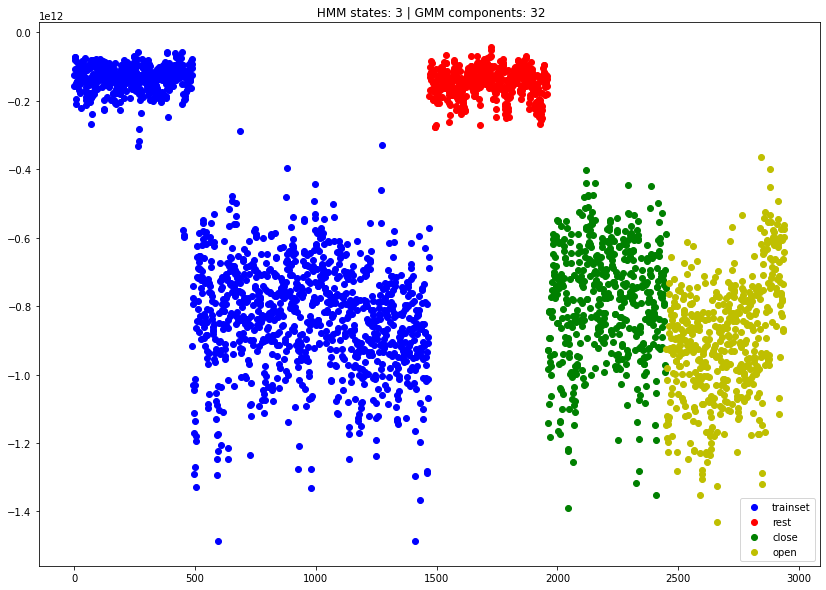

In [294]:
# fit_hmm(n_components=2, n_mix=1)
# fit_hmm(n_components=2, n_mix=2)
# fit_hmm(n_components=2, n_mix=3)
# fit_hmm(n_components=2, n_mix=4)
classifier = fit_hmm(n_components=3, n_mix=32)
# hidden_states = classifier.predict(X_train, len(X_train))
# print(hidden_states)
# print(len(hidden_states))

# for z in range (len(X_close)):
#     hidden_states =  classifier.predict(np.reshape(X_[z],[len(X_[z]),1]))
#     print(hidden_states)

In [295]:
def organize_states(organized_states, model):
    mus = np.array(model.means_)
    sigmas = np.array(np.sqrt(        np.array(     [np.diag(model.covars_[0]),np.diag(model.covars_[1]), np.diag(model.covars_[2]) ] )      )         )
    # print(len(model.covars_))
    P = np.array(model.transmat_)
    index_order = np.argsort(np.transpose (mus) )
    # print (index_order)
    mus = mus[index_order]
    # print(len(mus))
    sigmas = sigmas[index_order]
    newP = np.zeros(np.shape(P))
    state_indices = []
    for i in range(len(mus)):
        # newP[i,:] = P[index_order[0][i],index_order]
        state_indices.append(np.where(organized_states==index_order[0][i]))

    for i in range(len(state_indices)):
        organized_states[state_indices[i]] = i

    return organized_states
        


# states = classifier.predict(X_test, len(X_test))
# print(states)
# states = organize_states(states, classifier)
# print(states)
# print(mus[1][0][1])
# print (mus[0] > mus[1])


In [301]:
print("==================================================================================================================================================================")
test_states = []
plot_series = []
test_states = classifier.predict(X_rest, len(X_rest))
# test_states = organize_states(test_states, classifier)
# plot_series = open_hand_series[0].to_numpy()

# plt.figure(figsize=(14,10))
# plot_step = len(plot_series)/len(test_states)

e0 = 0
e1 = 0
e2 = 0
for i in range (len(test_states)):
    if (test_states[i] == 0):
        e0+=1
    if (test_states[i] == 1):
        e1+=1 
    if (test_states[i] == 2):
        e1+=1
print("REST HAND")
print("Total = " + str(e1 + e2 + e0))
print("Acertos  = " + str(e1))
print("Erros    = " + str(e2 + e1))
print("Acurácia = " + str( 100* (e1/len(test_states)) ) + "%")
print("e0 = " + str(e0))
print("e1 = " + str(e1))
print("e2 = " + str(e2))
# print(test_states)
# plt.plot((np.arange(start=0, stop=len(plot_series), step=plot_step)), (test_states), marker = 'o', linestyle='', c = 'r')
# plt.legend()
# plt.show()


##########################################################################################################################################################################
print("==================================================================================================================================================================")
test_states = []
plot_series = []
test_states = classifier.predict(X_close, len(X_close))
# test_states = organize_states(test_states, classifier)

# plot_series = rest_hand_series[0].to_numpy()

# plt.figure(figsize=(14,10))
# plt.plot(np.arange(plot_series.size), plot_series.flatten(), label='EMG')

e0 = 0
e1 = 0
e2 = 0
for i in range (len(test_states)):
    if (test_states[i] == 0):
        e0+=1
    if (test_states[i] == 1):
        e1+=1 
    if (test_states[i] == 2):
        e1+=1
print("CLOSE HAND")
print("Total = " + str(e1 + e2 + e0))
print("Acertos  = " + str(e1))
print("Erros    = " + str(e2 + e0))
print("Acurácia = " + str( 100* (e1/len(test_states)) ) + "%")
print("e0 = " + str(e0))
print("e1 = " + str(e1))
print("e2 = " + str(e2))
# print(test_states)

# plt.plot((np.arange(start=0, stop=len(plot_series), step=plot_step)), (test_states)/20000, marker = 'o', linestyle='', c = 'r')
# plt.show()
#########################################################################################################################################################################
print("==================================================================================================================================================================")
test_states = []
plot_series = []
test_states = classifier.predict(X_open, len(X_open))
# test_states = organize_states(test_states, classifier)

# plot_series = close_hand_series[0].to_numpy()
# plt.figure(figsize=(14,10))

e0 = 0
e1 = 0
e2 = 0
for i in range (len(test_states)):
    if (test_states[i] == 0):
        e0+=1
    if (test_states[i] == 1):
        e1+=1 
    if (test_states[i] == 2):
        e2+=1
print("OPEN HAND")
print("Total = " + str(e1 + e2 + e0))
print("Acertos  = " + str(e0))
print("Erros    = " + str(e1 + e2))
print("Acurácia = " + str( 100* (e0/len(test_states)) ) + "%")
print("e0 = " + str(e0))
print("e1 = " + str(e1))
print("e2 = " + str(e2))
# print(test_states)
# plt.plot((np.arange(start=0, stop=len(plot_series), step=plot_step)), (test_states)/20000, marker = 'o', linestyle='', c = 'r')
# plt.show()
#########################################################################################################################################################################
print("==================================================================================================================================================================")

test_states = []
plot_series = []
test_states = classifier.predict(X_test, len(X_test)) # Test = concatenate ( rest, close, open)
# test_states = organize_states(test_states, classifier)

# plot_series = close_hand_series[0].to_numpy()
# plt.figure(figsize=(14,10))

e0 = 0
e1 = 0
e2 = 0
for i in range (len(test_states)):
    if (i == 490 or i == 980):
        print(i)
        print("e0 = " + str(e0))
        print("e1 = " + str(e1))
        print("e2 = " + str(e2))         
    if (test_states[i] == 0):
        e0+=1
    if (test_states[i] == 1):
        e1+=1 
    if (test_states[i] == 2):
        e2+=1
print("TEST")
# print("Total = " + str(e1 + e2 + e0))
# print("Acertos  = " + str(e0))
# print("Erros    = " + str(e2 + e1))
# print("Acurácia = " + str( 100* (e0/len(test_states)) ) + "%")
print("e0 = " + str(e0))
print("e1 = " + str(e1))
print("e2 = " + str(e2))
print(len(test_states))
# plt.plot((np.arange(start=0, stop=len(plot_series), step=plot_step)), (test_states)/20000, marker = 'o', linestyle='', c = 'r')
# plt.show()



REST HAND
Total = 490
Acertos  = 490
Erros    = 490
Acurácia = 100.0%
e0 = 0
e1 = 490
e2 = 0
CLOSE HAND
Total = 490
Acertos  = 480
Erros    = 10
Acurácia = 97.95918367346938%
e0 = 10
e1 = 480
e2 = 0
OPEN HAND
Total = 490
Acertos  = 413
Erros    = 77
Acurácia = 84.28571428571429%
e0 = 413
e1 = 0
e2 = 77
490
e0 = 0
e1 = 490
e2 = 0
980
e0 = 9
e1 = 490
e2 = 481
TEST
e0 = 422
e1 = 490
e2 = 558
1470


# Test with a varied signal

## read file
## segment
## extract features
## predict with trained model
## plot and analyse

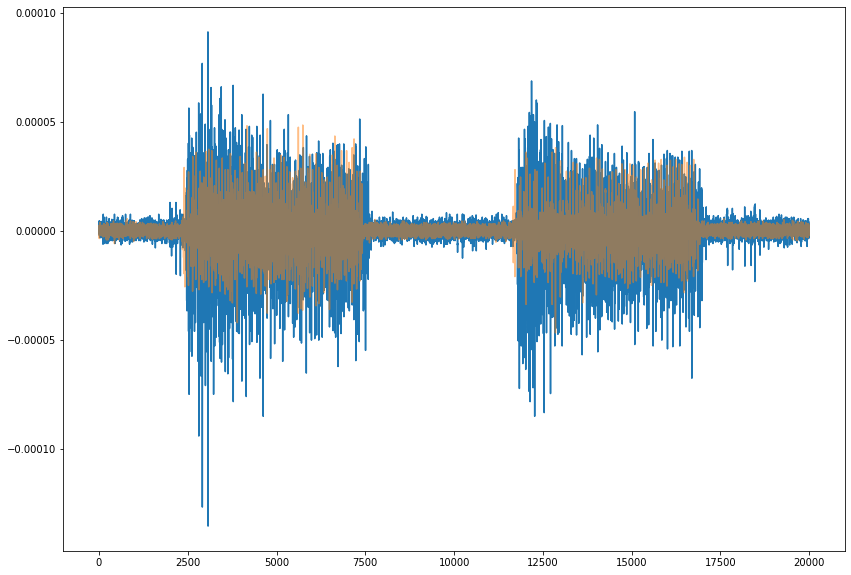

398
398
398.0
[ 5.70772152e-01  6.60009394e-03  4.55708623e-02 -8.72124101e-02
  2.66481333e-01 -9.73447474e-02 -1.00615376e-02  3.29118338e-02
  2.49918722e-06  1.40713995e-06]
Total = 398
Estado 0  = 205
Estado 1    = 178
Estado 2 = 15


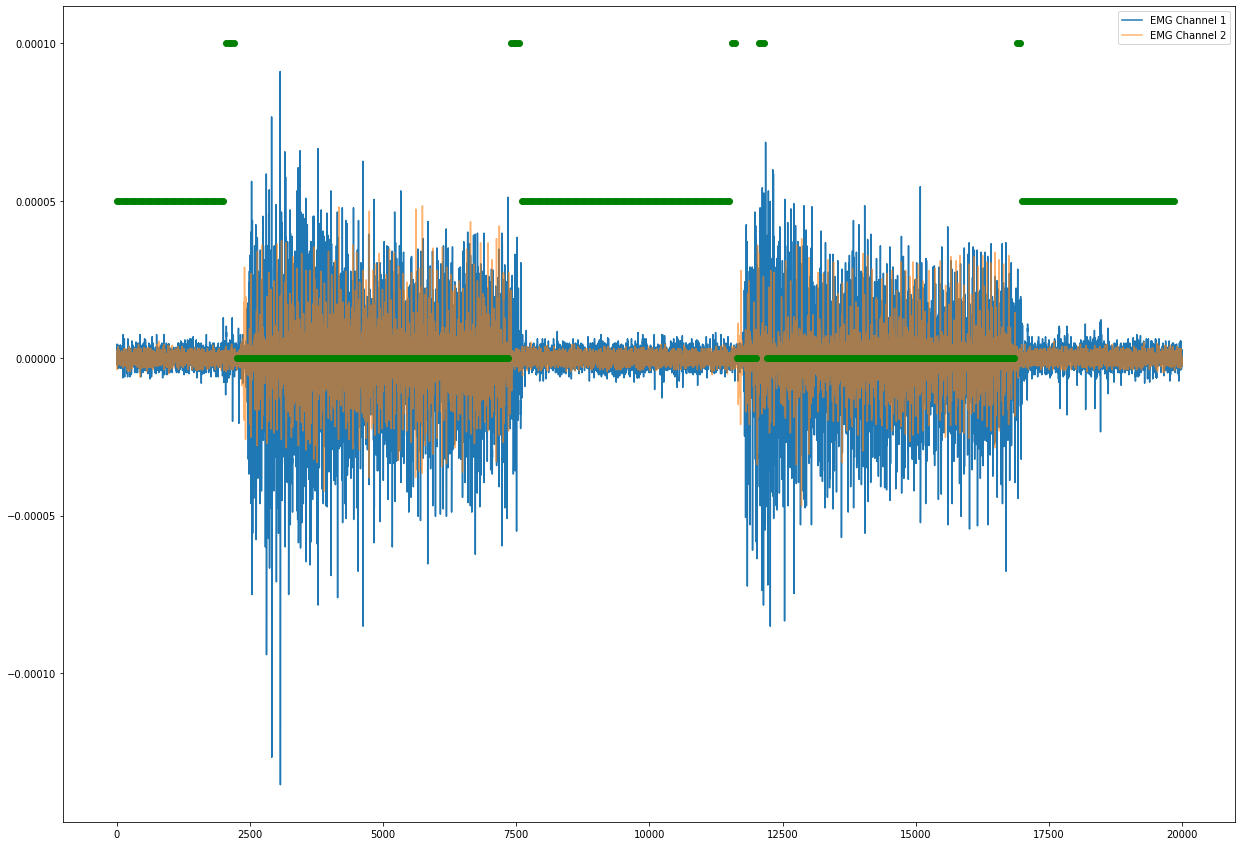

In [302]:
########################################################################################################################################################################
#READ FILE
########################################################################################################################################################################
file_name = 'https://raw.githubusercontent.com/raphaelrcb/TCC_UnB/raphael_dev/data/teste_2.csv'

final_test_series1 = read_csv(file_name, header=2, usecols = [0,1], index_col = 0)
final_test_series1.index = pd.to_datetime(final_test_series1.index, unit = 's', origin= 'unix')
final_test_series1.index = final_test_series1.index.map(lambda t: t.replace(year=2021, month=10, day=31, hour=00))
final_test_series1.index = pd.DatetimeIndex(final_test_series1.index).to_period('L')


final_test_series2 = read_csv(file_name, header=2, usecols = [0,2], index_col = 0)
final_test_series2.index = pd.to_datetime(final_test_series2.index, unit = 's', origin= 'unix')
final_test_series2.index = final_test_series2.index.map(lambda t: t.replace(year=2021, month=10, day=31, hour=00))
final_test_series2.index = pd.DatetimeIndex(final_test_series2.index).to_period('L')

plt.figure(figsize=(14,10))
plot_series = final_test_series1.to_numpy()
plt.plot(np.arange(plot_series.size), plot_series.flatten(), label='EMG channel 1')
plot_series = final_test_series2.to_numpy()
plt.plot(np.arange(plot_series.size), plot_series.flatten(), label='EMG channel 2', alpha=0.5)
plt.show()

# plt.figure(figsize=(14,10))
# final_test_series1.plot(figsize=(14,10))

########################################################################################################################################################################
# SEGMENTING DATA
########################################################################################################################################################################

data_size = len(final_test_series1)
window_size = 150
window_overlap = 50

n_windows = (data_size - window_size)/window_overlap + 1

final_windows1 = []
final_windows2 = []

for i in range(int(n_windows)):
    final_windows1.append(final_test_series1[(i*window_overlap):(i*window_overlap + window_size)] )
    final_windows2.append(final_test_series2[(i*window_overlap):(i*window_overlap + window_size)] )

print(len(final_windows1))
print(len(final_windows2))
print(n_windows)

########################################################################################################################################################################
# FEATURE EXTRACTION
########################################################################################################################################################################



final_features = []
final_features2 = []
for i in range(int(n_windows)):
    #extracting for rest gesture
    ar_model = ARIMA(final_windows1[i], order = (4,0,0))
    ar_fit   = ar_model.fit(method='yule_walker')
    final_features.append(ar_fit.polynomial_ar)
    final_features[i] = np.delete(final_features[i], 0)
    final_features[i] = -final_features[i]

    ar_model = ARIMA(final_windows2[i], order = (4,0,0))
    ar_fit   = ar_model.fit(method='yule_walker')
    final_features2 = ar_fit.polynomial_ar
    final_features2 = np.delete(final_features2, 0)
    final_features[i] = np.append(final_features[i], -final_features2)

    final_features[i] = np.append(final_features[i], rms(final_windows1[i].to_numpy().flatten()), len(final_windows1[i]))
    final_features[i] = np.append(final_features[i], rms(final_windows2[i].to_numpy().flatten()), len(final_windows2[i]))

# print(final_features[0])
########################################################################################################################################################################
# PREDICT WITH TRAINED MODEL
########################################################################################################################################################################

final_states = classifier.predict(final_features, len(final_features))
# final_states = organize_states(final_states, classifier)
e0 = 0
e1 = 0
e2 = 0
for i in range (len(final_states)):
    if (final_states[i] == 0):
        e0+=1
    if (final_states[i] == 1):
        e1+=1 
    if (final_states[i] == 2):
        e2+=1
# print("OPEN HAND")
print("Total = " + str(e1 + e2 + e0))
print("Estado 0  = " + str(e0))
print("Estado 1    = " + str(e1))
print("Estado 2 = " + str(e2))


########################################################################################################################################################################
# PRINT
########################################################################################################################################################################

plot_series = final_test_series1.to_numpy()
plt.figure(figsize=(21,15))
# print(plot_series.flatten())
# print(plot_series.size)
plt.plot(np.arange(plot_series.size), plot_series.flatten(), label='EMG Channel 1')
plot_series = final_test_series2.to_numpy()
plt.plot(np.arange(plot_series.size), plot_series.flatten(), label='EMG Channel 2', alpha = 0.6)
# state_0 = np.ma.masked_where(final_states == 0, final_states)
# state_1 = np.ma.masked_where(final_states == 1, final_states)
# state_2 = np.ma.masked_where(final_states == 2, final_states)

plt.plot((np.arange(start=0, stop=len(final_states)*window_overlap, step=window_overlap)), (final_states)/20000, marker = 'o', linestyle='', c = 'g')
# plt.plot((np.arange(start=0, stop=len(final_states)*window_overlap, step=window_overlap)), (state_0)/20000, marker = 'o', c = 'r', label='hand resting')
# plt.plot((np.arange(start=0, stop=len(final_states)*window_overlap, step=window_overlap)), (state_1)/20000, marker = 'o', c= 'm', label='hand closed')
# plt.plot((np.arange(start=0, stop=len(final_states)*window_overlap, step=window_overlap)), (state_2)/20000, marker = 'o', c= 'g', label='hand opened')
plt.legend()
plt.show()